In [7]:
#Time series forecasting using RNN
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [8]:
data = np.sin(np.arange(100)*0.1)

In [9]:
x, y = [], []
for i in range(len(data)-10):
    x.append(data[i:i+10])
    y.append(data[i+10])

x, y = np.array(x), np.array(y)
x = x.reshape(-1, 10, 1)

In [10]:
model = Sequential([
    LSTM(20, input_shape=(10,1)),
    Dense(1)
])

c:\Users\devda\OneDrive\Documents\Devdatt\practice VI sem\dl\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam', loss='mse')
model.fit(x, y, epochs=10)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.3836
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3539
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3153
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2964
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2451
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2124
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2014
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1809
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1668
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1460


In [12]:
preds = []
seq = x[-1]

for i in range(10):
    pred = model.predict(seq.reshape(1,10,1), verbose=0)[0,0]
    preds.append(pred)
    seq = np.roll(seq, -1)
    seq[-1] = pred

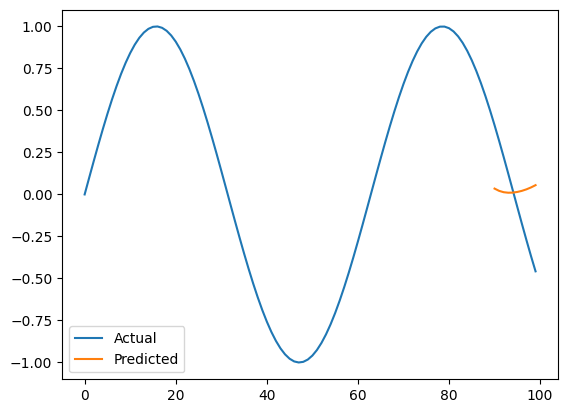

In [18]:
plt.plot(data, label="Actual")
plt.plot(range(90,100), preds, label="Predicted")
plt.legend()
plt.show()